In [1]:
%pip install geocoder
%pip install leafmap
%pip install keplergl
%pip install geopandas
%pip install shapely
%pip install polyline shapely

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import leafmap.kepler as leafmap
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString

In [3]:
m = leafmap.Map(center=[51.52738771088042, -0.15355043538426116], zoom=14, height=600)
m

Map(config={'version': 'v1', 'config': {'mapState': {'latitude': 51.52738771088042, 'longitude': -0.1535504353…

In [4]:
df = pd.DataFrame({'longitude': [-0.15355043538426116, -0.1734286299198402] , 'latitude': [51.52738771088042, 51.50723029796882]})


geometry = gpd.GeoSeries.from_xy(df.longitude, df.latitude, crs="EPSG:4326")
geometry

0    POINT (-0.15355 51.52739)
1    POINT (-0.17343 51.50723)
dtype: geometry

In [5]:
m = leafmap.Map(center=[51.52738771088042, -0.15355043538426116], zoom=8, height=600)
m.add_gdf(geometry, "Points")
m

Map(config={'version': 'v1', 'config': {'mapState': {'latitude': 51.52738771088042, 'longitude': -0.1535504353…

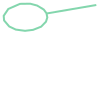

In [6]:
a = LineString([
          [
            -0.14594972886106916,
            51.52894559042994
          ],
          [
            -0.15129551682267106,
            51.528032855631494
          ],
          [
            -0.15160535880559678,
            51.52845341849624
          ],
          [
            -0.1523200326853953,
            51.52888527901317
          ],
          [
            -0.15306815191993906,
            51.529085073160246
          ],
          [
            -0.15416644905539556,
            51.52906946502597
          ],
          [
            -0.15542601537725886,
            51.52852049779611
          ],
          [
            -0.15592220416849045,
            51.52778058446981
          ],
          [
            -0.15588035911886777,
            51.52728077227175
          ],
          [
            -0.15533231695596328,
            51.52663527065718
          ],
          [
            -0.15462029969279456,
            51.5262980383138
          ],
          [
            -0.15362806237664017,
            51.52616485014991
          ],
          [
            -0.15276108049147297,
            51.526267843705796
          ],
          [
            -0.1518908002990429,
            51.52661042402386
          ],
          [
            -0.151368460601077,
            51.52714885220857
          ],
          [
            -0.15122574843908865,
            51.5276024316164
          ],
          [
            -0.15131261295630338,
            51.52804851126257
          ]
        ])
a

In [7]:
a = gpd.GeoSeries(a, crs='4326')

In [8]:
m = leafmap.Map(center=[51.52738771088042, -0.15355043538426116], zoom=8, height=1000, widescreen=False)
m.add_gdf(a, "Linestring Layer")
m

Map(config={'version': 'v1', 'config': {'mapState': {'latitude': 51.52738771088042, 'longitude': -0.1535504353…

In [9]:
import geocoder # pip install geocoder
g = geocoder.arcgis('London, Tower Bridge Rd, London SE1 2UP')
latlon = g.lat, g.lng
print(latlon)

(51.5033779207167, -0.07657865997245494)


In [10]:
df = pd.DataFrame({'longitude': [latlon[1]] , 'latitude': [latlon[0]]})
geometry = gpd.GeoSeries.from_xy(df.longitude, df.latitude , crs="EPSG:4326")
m = leafmap.Map(center=[51.52738771088042, -0.15355043538426116], zoom=12, height=1000, widescreen=False)
m.add_gdf(geometry, "Points")
m

Map(config={'version': 'v1', 'config': {'mapState': {'latitude': 51.52738771088042, 'longitude': -0.1535504353…

In [13]:
df= pd.read_csv('open_pubs.csv')
df = df.iloc[:300,:]
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])
df.head()

,fas_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,24,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER, E...",CO7 6LW,604748,234405.0,51.970390,0.979328,Babergh
1,30,Angel Inn,"Egremont Street, Glemsford, SUDBURY, Suffolk",CO10 7SA,582888,247368.0,52.094427,0.668408,Babergh
2,63,Black Boy Hotel,"7 Market Hill, SUDBURY, Suffolk",CO10 2EA,587356,241327.0,52.038683,0.730226,Babergh
3,64,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER, E...",CO7 6JS,604270,233920.0,51.966211,0.972091,Babergh
4,65,Black Lion,"Lion Road, Glemsford, SUDBURY, Suffolk",CO10 7RF,582750,248298.0,52.102815,0.666893,Babergh


In [16]:
df = pd.DataFrame({'longitude': df.longitude , 'latitude': df.latitude})
geometry = gpd.GeoSeries.from_xy(df.longitude, df.latitude , crs="EPSG:4326")
m = leafmap.Map(center=[51.52738771088042, -0.15355043538426116], zoom=12, height=1000, widescreen=False)
m.add_gdf(geometry, "Points")
m

Map(config={'version': 'v1', 'config': {'mapState': {'latitude': 51.52738771088042, 'longitude': -0.1535504353…

In [17]:
# importing the requests library
import requests

# api-endpoint
url = "https://router.project-osrm.org/route/v1/driving/13.388860,52.517037;13.397634,52.529407;13.428555,52.523219?overview=full"



# sending get request and saving the response as response object
r = requests.get(url )

# extracting data in json format
data = r.json()
encoded_polyline = data['routes'][0]['geometry']
encoded_polyline

'mfp_I__vpAWBSBE?C?C@m@DuALI@O@wAJK@SBOOG@K@c@DyBPA?G@IDIDA@M@]BUBSBA?E@E@A@IFWBG@C?WBm@FG@I@aBNG@k@FM@OBaBNG@M@mAFc@@}@Fu@DG?a@B]@oAF}@JA?[Do@FoCXSBO@ODA@UDA?ODE@GBC?uBNE?OAKCC]AK]mCCUGg@[iCUaBAKAOSsAE[i@mEa@eDAMACAKCQGi@AKQuACOKy@E_@G[Gc@]wBw@aFKw@M{@k@qDCMAKIq@?KAQ?KIuDI_D?GAk@AWCaAEuB@U@U?MCs@?I?IASAg@ASMaF?OAi@?c@@c@Du@r@cH@U@I@G@I?G~@kJRyBf@uE@KFi@@KBOLeABMFc@Da@@GT_CDa@Fk@Ny@Ha@RiAfBuJF]DOh@yAHSf@aADIR_@JS@C@A@CJSWWEECEECOQe@a@CCUQaCkB{@y@GESO?_@?C?C?i@G{BIsCAKA[MaE?SKgDCi@?Q?YBKf@_ENg@D]T{ABIHm@FY@GBUJk@@IHcA?c@?QAQG]JKDC@ADCHOL]FOFUT{@BKTu@La@\\gANg@L_@DOJ[~@kBP[JSXg@^q@R]Ta@HQR]b@y@^s@Xg@JQHQP_@HQLMLKRIFAL?J@HBFBr@XNH^NHDTJNFTRRJd@LXFB@B?J@J@@X?L?F@jA@dB'

In [19]:
import polyline
decoded_polyline = polyline.decode(encoded_polyline, 5)
decoded_polyline = [t[::-1] for t in decoded_polyline]
decoded_polyline = gpd.GeoSeries(LineString(decoded_polyline[::-1]), crs='4326')

In [20]:
# geometry = gpd.GeoSeries.from_xy(decoded_polyline_points.longitude, decoded_polyline_points.latitude , crs="EPSG:4326")
m = leafmap.Map(center=[51.52738771088042, -0.15355043538426116], zoom=12, height=1000, widescreen=False)
m.add_gdf(decoded_polyline, "Points")
m

Map(config={'version': 'v1', 'config': {'mapState': {'latitude': 51.52738771088042, 'longitude': -0.1535504353…

In [21]:
def main(path):
  url = ''
  df= pd.read_csv(path)
  df = df.iloc[:300,:]
  df['latitude'] = pd.to_numeric(df['latitude'])
  df['longitude'] = pd.to_numeric(df['longitude'])
  for i in range(len(df)):
    url += str(df['longitude'][i]) + ',' + str(df['latitude'][i]) + ';'
  url = f"https://router.project-osrm.org/route/v1/driving/{url[:-2]}?overview=full"
  r = requests.get(url )
  data = r.json()
  encoded_polyline = data['routes'][0]['geometry']
  decoded_polyline = polyline.decode(encoded_polyline, 5)
  decoded_polyline = [t[::-1] for t in decoded_polyline]
  decoded_polyline = gpd.GeoSeries(LineString(decoded_polyline[::-1]), crs='4326')
  return decoded_polyline

In [22]:
route = main('open_pubs.csv')

In [23]:
route

0    LINESTRING (-0.50739 52.13843, -0.50744 52.138...
dtype: geometry

In [24]:
m = leafmap.Map(center=[51.52738771088042, -0.15355043538426116], zoom=12, height=600, widescreen=False)
m.add_gdf(route, "route")
m

Map(config={'version': 'v1', 'config': {'mapState': {'latitude': 51.52738771088042, 'longitude': -0.1535504353…